In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Data/Raw/rawdata.csv")
print (df.head(6))

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   
5        Private          Urban             186.21  29.0  for

In [4]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Example columns
columns_info = {
    'stroke': 'Stroke',
    'heart_disease': 'Heart Disease',
    'hypertension': 'Hypertension'
}

# Create subplots: 1 row, 3 columns
fig = make_subplots(
    rows=1,
    cols=len(columns_info),
    subplot_titles=list(columns_info.values())
)

# Define colors (0 = lightsteelblue, 1 = red)
color_map = {
    0: 'lightsteelblue',
    1: 'red'
}

total = len(df)  # total number of rows

for i, (col, label) in enumerate(columns_info.items(), start=1):
    # Count how many rows have '1' in this column
    positive_count = df[col].sum()  # sum of 1's
    percentage = positive_count / total * 100
    # Round how many of the 100 squares should be "filled" (blue)
    filled_squares = round(percentage)

    # Build a 10x10 grid of x,y positions (0..9)
    x_positions = [j % 10 for j in range(100)]
    y_positions = [j // 10 for j in range(100)]

    # Color each square: the first 'filled_squares' squares get color=1, rest color=0
    color_values = [
        color_map[1] if j < filled_squares else color_map[0]
        for j in range(100)
    ]

    # Create a Scatter trace of circles
    trace = go.Scatter(
        x=x_positions,
        y=y_positions,
        mode='markers',
        marker=dict(
            size=23,                      # circle size
            color=color_values,
            line=dict(width=1, color='white')  # small white border
        ),
        showlegend=False,
        hoverinfo='skip'  # hide tooltip text
    )

    fig.add_trace(trace, row=1, col=i)

    # Hide numeric axis labels and ticks; define ranges so the grid fits nicely
    fig.update_xaxes(
        visible=False,
        range=[-0.5, 9.5],
        row=1,
        col=i
    )
    fig.update_yaxes(
        visible=False,
        range=[-0.5, 9.5],
        row=1,
        col=i
    )

    # Add a big, centered percentage annotation in domain coordinates, with bold text
    fig.add_annotation(
        text=f"<b>{percentage:.0f}%</b>",  # e.g., <b>53%</b>
        x=0.5,
        y=-0.15,  # Adjust this value if you need to move the text closer/further from the grid
        xref="x domain",
        yref="y domain",
        row=1,
        col=i,
        showarrow=False,
        font=dict(family="arial", size=24, color='red'),
        xanchor="center"
    )

# Adjust overall layout (including default font family/size and bottom margin)
fig.update_layout(
    width=900,
    height=400,
    margin=dict(t=80, b=100),  # Increase bottom margin so annotations aren't cut off
    font=dict(family="arial", size=24),
    title=dict(
        text="Distribution of Stroke, Heart Disease, and Hypertension",
        font=dict(family="arial", size=24)
    )
)

import plotly.io as pio
pio.show(fig)

This plot visually represents the distribution of three medical conditions - Stroke, Heart Disease, and Hypertension - using a 100-dot representation. Each dot represents 1% of the total dataset. The red dots indicate the percentage of occurrences for each condition:
Stroke: 5%
Heart Disease: 5%
Hypertension: 10%

An imbalanced dataset refers to a dataset where certain classes (e.g., presence of disease) occur much less frequently than others (e.g., no disease). This imbalance can impact machine learning models, particularly classification models, by making them biased toward the majority class.

In this dataset, the conditions of Stroke and Heart Disease occur much less frequently than Hypertension and significantly less than the absence of these conditions.
If a machine learning model is trained on such data without handling the imbalance, it may favor predicting the majority class (e.g., "No Stroke" or "No Heart Disease") because that would result in high overall accuracy while failing to properly identify actual cases.
This means a model might struggle to correctly predict Stroke or Heart Disease cases due to their rarity in the dataset.

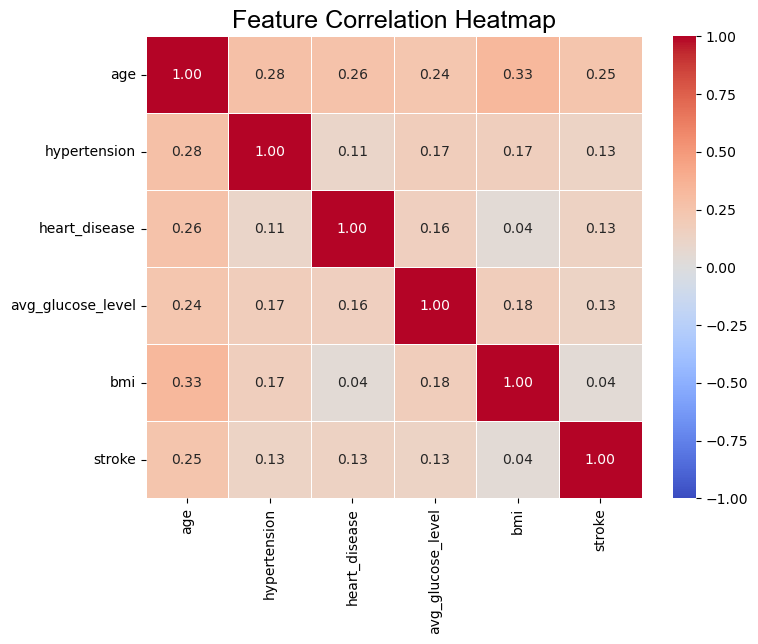

In [5]:
selected_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
corr_matrix = df[selected_columns].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix, 
    cmap='coolwarm', 
    annot=True, 
    fmt=".2f", 
    linewidths=0.5, 
    vmin=-1,  # Force scale minimum to -1
    vmax=1    # Force scale maximum to 1
)
plt.title('Feature Correlation Heatmap', fontdict={"family": "Arial", "size": 18, "color": "black"})
plt.show()

This correlation heatmap visualizes the relationships between six numerical variables: age, hypertension, heart disease, avg_glucose_level, BMI, and stroke. It uses Pearson’s correlation coefficient to measure how strongly each pair of variables is related, with values ranging from -1 (strong negative correlation) to 1 (strong positive correlation).

Key Observations from the Heatmap:
- Age and BMI (0.33)
There is a weak positive correlation between age and BMI, meaning older individuals tend to have slightly higher BMI values.
- Age and Hypertension (0.28) / Age and Heart Disease (0.26)
Weak positive correlation: As age increases, the likelihood of having hypertension and heart disease slightly increases.
- Age and Stroke (0.25)
There is a weak correlation between age and stroke, suggesting that older individuals have a slightly higher probability of experiencing a stroke.
- Avg_Glucose_Level and Stroke (0.13)
Weak positive correlation: Individuals with higher glucose levels tend to have a slightly increased chance of having a stroke.
- Hypertension and Heart Disease (0.11)
Weak correlation: Having hypertension does not strongly correlate with heart disease in this dataset.
- BMI and Stroke (0.04)
Almost no correlation: BMI does not significantly impact stroke incidence in this dataset.

No strong correlations (> 0.5) exist, meaning no variable in this dataset is a dominant predictor of another.
Age has the highest correlations with hypertension, heart disease, BMI, and stroke, but all are still relatively weak.
Stroke is weakly correlated with all variables, suggesting that additional factors (e.g., lifestyle, genetic predisposition) might play a bigger role in predicting strokes.
Avg_glucose_level has weak associations with other variables, indicating it may not be a primary factor in determining stroke or heart disease risks.

Implications for Machine Learning & Data Analysis:
Since no feature shows a strong correlation with stroke, feature engineering (e.g., interaction terms, non-linear transformations) might be necessary.
A machine learning model might struggle to predict stroke accurately using just these variables.
It could be beneficial to include additional features, such as smoking status, physical activity, or cholesterol levels, to improve prediction models.

In [6]:
df_stroke = pd.read_csv("stroke_full_data_cleaned.csv")
df_heart_disease = pd.read_csv("heart_disease_full_data_cleaned.csv")
df_hypertension = pd.read_csv("hypertension_full_data_cleaned.csv")

In [7]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_feature_pairs_by_stroke(data, feature_names):
    """
    Create 6 scatter plots in a 2x3 grid:
      - Top row: data where stroke == 1 (solid red markers)
      - Bottom row: data where stroke == 0 (royalblue markers)
    Each subplot uses the same axis range for a given feature across all plots.
    
    Parameters:
    - data: DataFrame containing the features and the 'stroke' column.
    - feature_names: List of three feature names (e.g., ['age', 'avg_glucose_level', 'bmi']).
    """
    # Define the feature pairs (3 pairs for 3 features)
    pairs = [
        (feature_names[0], feature_names[1]),
        (feature_names[0], feature_names[2]),
        (feature_names[1], feature_names[2])
    ]
    
    # Define custom colors for stroke groups
    color_map = {1: 'red', 0: 'royalblue'}
    
    # Compute global ranges for each feature across the entire dataset
    feature_ranges = {feat: (data[feat].min(), data[feat].max()) for feat in feature_names}
    
    # Create subplot titles for each row and pair
    titles_row1 = [f"Stroke: {x} vs {y}" for x, y in pairs]
    titles_row2 = [f"No Stroke: {x} vs {y}" for x, y in pairs]
    subplot_titles = titles_row1 + titles_row2  # First row then second row
    
    # Create a 2-row x 3-column subplot grid
    fig = make_subplots(rows=2, cols=3, subplot_titles=subplot_titles)
    
    # Filter data by stroke value
    data_stroke1 = data[data["stroke"] == 1]
    data_stroke0 = data[data["stroke"] == 0]
    
    # Plot for stroke == 1 (top row)
    for idx, (x_feature, y_feature) in enumerate(pairs):
        col = idx + 1  # subplot column index (1, 2, 3)
        fig.add_trace(
            go.Scatter(
                x=data_stroke1[x_feature],
                y=data_stroke1[y_feature],
                mode='markers',
                marker=dict(
                    size=8,
                    color=color_map[1]
                ),
                name="Stroke"
            ),
            row=1, col=col
        )
        # Update axes with consistent ranges for this feature
        fig.update_xaxes(title_text=x_feature, row=1, col=col, range=feature_ranges[x_feature])
        fig.update_yaxes(title_text=y_feature, row=1, col=col, range=feature_ranges[y_feature])
    
    # Plot for stroke == 0 (bottom row)
    for idx, (x_feature, y_feature) in enumerate(pairs):
        col = idx + 1
        fig.add_trace(
            go.Scatter(
                x=data_stroke0[x_feature],
                y=data_stroke0[y_feature],
                mode='markers',
                marker=dict(
                    size=8,
                    color=color_map[0]
                ),
                name="No Stroke"
            ),
            row=2, col=col
        )
        # Update axes with consistent ranges for this feature
        fig.update_xaxes(title_text=x_feature, row=2, col=col, range=feature_ranges[x_feature])
        fig.update_yaxes(title_text=y_feature, row=2, col=col, range=feature_ranges[y_feature])
    
    # Update the overall layout
    fig.update_layout(
        height=600,
        width=1200,
        title="Feature Pairs by Stroke",
        template="plotly_white",
        showlegend=False  # Adjust legend if needed
    )
    
    pio.show(fig)

feature_names = ['age', 'avg_glucose_level', 'bmi']
plot_feature_pairs_by_stroke(df_stroke, feature_names)


Key Takeaways:
- Higher glucose levels (>150 mg/dL) are more common in stroke cases, especially in older individuals.
- Age (50+) appears to be a key risk factor, especially when combined with high glucose levels.
- BMI does not show a strong separation between stroke and non-stroke individuals.
- Feature interactions (age × glucose level) might be a better predictor than individual features alone.

In [8]:
def plot_feature_pairs_by_heart_disease(data, feature_names):
    
    # Define the feature pairs (3 pairs for 3 features)
    pairs = [
        (feature_names[0], feature_names[1]),
        (feature_names[0], feature_names[2]),
        (feature_names[1], feature_names[2])
    ]
    
    # Define custom colors for heart disease groups
    color_map = {1: 'red', 0: 'royalblue'}
    
    # Compute global ranges for each feature across the entire dataset
    feature_ranges = {feat: (data[feat].min(), data[feat].max()) for feat in feature_names}
    
    # Create subplot titles for each row and pair
    titles_row1 = [f"Heart Disease: {x} vs {y}" for x, y in pairs]
    titles_row2 = [f"No Heart Disease: {x} vs {y}" for x, y in pairs]
    subplot_titles = titles_row1 + titles_row2  # First row then second row
    
    # Create a 2-row x 3-column subplot grid
    fig = make_subplots(rows=2, cols=3, subplot_titles=subplot_titles)
    
    # Filter data by heart_disease value
    data_heart_disease1 = data[data["heart_disease"] == 1]
    data_heart_disease0 = data[data["heart_disease"] == 0]
    
    # Plot for heart_disease == 1 (top row)
    for idx, (x_feature, y_feature) in enumerate(pairs):
        col = idx + 1  # subplot column index (1, 2, 3)
        fig.add_trace(
            go.Scatter(
                x=data_heart_disease1[x_feature],
                y=data_heart_disease1[y_feature],
                mode='markers',
                marker=dict(
                    size=8,
                    color=color_map[1]
                ),
                name="Heart Disease"
            ),
            row=1, col=col
        )
        # Update axes with consistent ranges for this feature
        fig.update_xaxes(title_text=x_feature, row=1, col=col, range=feature_ranges[x_feature])
        fig.update_yaxes(title_text=y_feature, row=1, col=col, range=feature_ranges[y_feature])
    
    # Plot for heart_disease == 0 (bottom row)
    for idx, (x_feature, y_feature) in enumerate(pairs):
        col = idx + 1
        fig.add_trace(
            go.Scatter(
                x=data_heart_disease0[x_feature],
                y=data_heart_disease0[y_feature],
                mode='markers',
                marker=dict(
                    size=8,
                    color=color_map[0]
                ),
                name="No Heart Disease"
            ),
            row=2, col=col
        )
        # Update axes with consistent ranges for this feature
        fig.update_xaxes(title_text=x_feature, row=2, col=col, range=feature_ranges[x_feature])
        fig.update_yaxes(title_text=y_feature, row=2, col=col, range=feature_ranges[y_feature])
    
    # Update the overall layout
    fig.update_layout(
        height=600,
        width=1200,
        title="Feature Pairs by Heart Disease",
        template="plotly_white",
        showlegend=False  # Adjust legend if needed
    )
    
    pio.show(fig)


feature_names = ['age', 'avg_glucose_level', 'bmi']
plot_feature_pairs_by_heart_disease(df_heart_disease, feature_names)

Key Takeaways:
- Higher glucose levels (>150 mg/dL) are more common in heart disease cases, especially in older individuals (50+ years).
- Age (50+) appears to be a key risk factor, especially when combined with high glucose levels.
- BMI does not show a strong separation between heart disease and non-heart disease individuals.
- Feature interactions (e.g., age × glucose level) might be better predictors than individual features alone.

In [9]:
def plot_feature_pairs_by_hypertension(data, feature_names):
    
    # Define the feature pairs (3 pairs for 3 features)
    pairs = [
        (feature_names[0], feature_names[1]),
        (feature_names[0], feature_names[2]),
        (feature_names[1], feature_names[2])
    ]
    
    # Define custom colors for hypertension groups
    color_map = {1: 'red', 0: 'royalblue'}
    
    # Compute global ranges for each feature across the entire dataset
    feature_ranges = {feat: (data[feat].min(), data[feat].max()) for feat in feature_names}
    
    # Create subplot titles for each row and pair
    titles_row1 = [f"Hypertension: {x} vs {y}" for x, y in pairs]
    titles_row2 = [f"No Hypertension: {x} vs {y}" for x, y in pairs]
    subplot_titles = titles_row1 + titles_row2  # First row then second row
    
    # Create a 2-row x 3-column subplot grid
    fig = make_subplots(rows=2, cols=3, subplot_titles=subplot_titles)
    
    # Filter data by ypertension value
    data_hypertension1 = data[data["hypertension"] == 1]
    data_hypertension0 = data[data["heart_disease"] == 0]
    
    # Plot for hypertension == 1 (top row)
    for idx, (x_feature, y_feature) in enumerate(pairs):
        col = idx + 1  # subplot column index (1, 2, 3)
        fig.add_trace(
            go.Scatter(
                x=data_hypertension1[x_feature],
                y=data_hypertension1[y_feature],
                mode='markers',
                marker=dict(
                    size=8,
                    color=color_map[1]
                ),
                name="Hypertension"
            ),
            row=1, col=col
        )
        # Update axes with consistent ranges for this feature
        fig.update_xaxes(title_text=x_feature, row=1, col=col, range=feature_ranges[x_feature])
        fig.update_yaxes(title_text=y_feature, row=1, col=col, range=feature_ranges[y_feature])
    
    # Plot for heart_disease == 0 (bottom row)
    for idx, (x_feature, y_feature) in enumerate(pairs):
        col = idx + 1
        fig.add_trace(
            go.Scatter(
                x=data_hypertension0[x_feature],
                y=data_hypertension0[y_feature],
                mode='markers',
                marker=dict(
                    size=8,
                    color=color_map[0]
                ),
                name="No Hypertension"
            ),
            row=2, col=col
        )
        # Update axes with consistent ranges for this feature
        fig.update_xaxes(title_text=x_feature, row=2, col=col, range=feature_ranges[x_feature])
        fig.update_yaxes(title_text=y_feature, row=2, col=col, range=feature_ranges[y_feature])
    
    # Update the overall layout
    fig.update_layout(
        height=600,
        width=1200,
        title="Feature Pairs by Hypertension",
        template="plotly_white",
        showlegend=False  # Adjust legend if needed
    )
    
    pio.show(fig)

feature_names = ['age', 'avg_glucose_level', 'bmi']
plot_feature_pairs_by_hypertension(df_hypertension, feature_names)

Key Takeaways:
- Age (50+) is strongly associated with hypertension.
- Higher glucose levels (>150 mg/dL) are more frequent in hypertensive individuals.
- BMI does not show a strong distinction between hypertensive and non-hypertensive individuals, but overweight individuals are more represented.
- Feature interactions (e.g., age × glucose level) might be better predictors than BMI alone.